In [ ]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image
import cv2 as cv

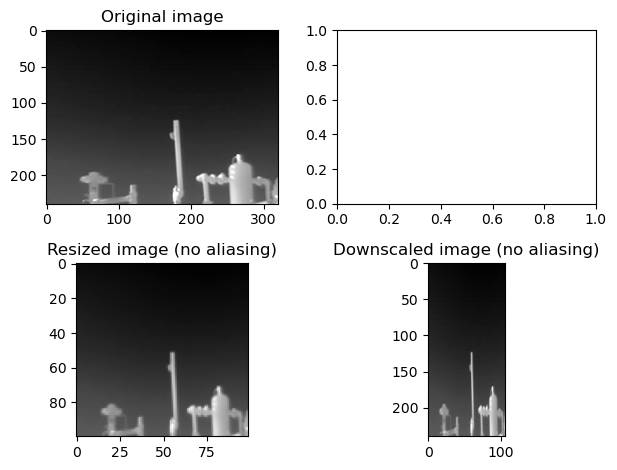

In [ ]:
#image shape 240hx320w
#image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image = cv.imread("Leaks/leak.frame19.jpg")
#print(image.shape[0])
image_resized = resize(image, (image.shape[0] // 2.4, image.shape[1] // 3.2),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image,(1,3,12))
#Image.getpixel()
#print(width)

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

#ax[1].imshow(image_rescaled, cmap='gray')
#ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 320)
ax[0].set_ylim(240, 0)
plt.tight_layout()
plt.show()

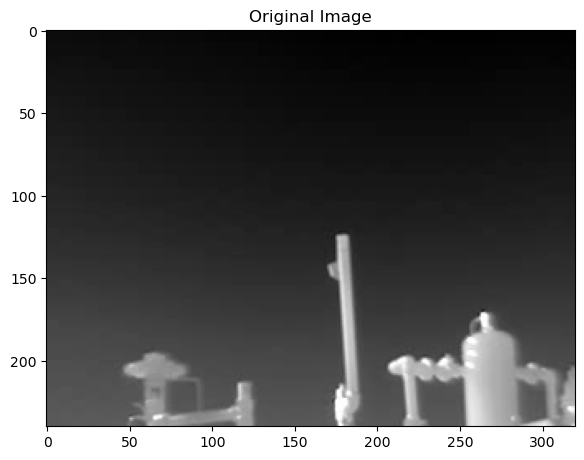

In [ ]:
res = cv.resize(image, None, fx=3.2, fy=12, interpolation = cv.INTER_CUBIC)
plt.figure(figsize=(15,12))
plt.subplot(121)
plt.imshow(image,cmap = 'gray')
plt.title('Original Image')
#plt.subplot(122)
#plt.imshow(res,cmap = 'gray')
#plt.title('Downsampled Image')

plt.show()

In [11]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
for k in range(19, 1535):
  img1 = cv2.imread('/content/gdrive/MyDrive/Methane_Team/Data_images/leak.frame{}.jpg'.format(k), 0)
  #print(img1)
    
  # Obtain the size of the original image
  [m, n] = img1.shape
  #print('Image Shape:', m, n)
    
  # Show original image
  #print('Original Image:')
  #plt.imshow(img1, cmap="gray")  
  
  #Down sampling
  w = 12
  h = 3
    
  # Assign a down sampling rate
  # Here we are down sampling the
  # Create a matrix of all zeros for
  # downsampled values
  img2 = np.zeros((m//w, n//h) ,dtype=int)
  [m2, n2] = img2.shape
  #print('Image Shape:', m2, n2)

  # Assign the down sampled values from the original
  # image according to the down sampling frequency.
  # For example, if the down sampling rate f=2, take
  # pixel values from alternate rows and columns
  # and assign them in the matrix created above
  for i in range(0, m, w):
      for j in range(0, n, h):
          try:
    
              img2[i//w][j//h] = img1[i][j]
          except IndexError:
              pass
  #  
  # Show down sampled image
  #print('Down Sampled Image:')
  #plt.imshow(img2, cmap="gray")
  #plt.title("Downscaled Image")
  cv2.imwrite('/content/gdrive/MyDrive/Methane_Team/Leakage_Classification/Hardware_image_testing/DS_20x106/newleak_20x106{}.jpg'.format(k),img2)
  print('Success')

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


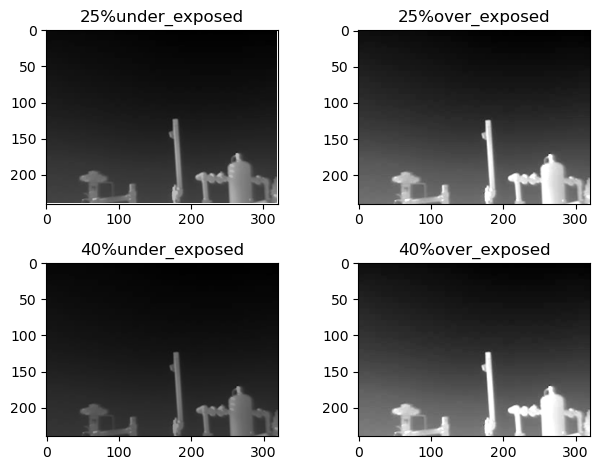

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

#read the image
im = Image.open("Leaks/leak.frame19.jpg")

#image brightness enhancer
enhancer = ImageEnhance.Brightness(im)

factor = 1 #gives original image
im_output1 = enhancer.enhance(factor)
#im_output.save('original-image.jpg')

factor2 = 0.75 #darkens the image
im_output2 = enhancer.enhance(factor2)
#im_output.save('25%underexposed-image.jpg')

factor3 = 1.25 #brightens the image
im_output3 = enhancer.enhance(factor3)
#im_output.save('25%overexposed-image.jpg')

factor4 = 0.6 #darkens the image
im_output4 = enhancer.enhance(factor4)
#im_output.save('40%underexposed-image.jpg')

factor5 = 1.4 #brightens the image
im_output5 = enhancer.enhance(factor5)
#im_output.save('40%overexposed-image.jpg')

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(im_output2, cmap='gray')
ax[0].set_title("25%under_exposed")

ax[1].imshow(im_output3, cmap='gray')
ax[1].set_title("25%over_exposed")

ax[2].imshow(im_output4, cmap='gray')
ax[2].set_title("40%under_exposed")

ax[3].imshow(im_output5, cmap='gray')
ax[3].set_title("40%over_exposed")

ax[0].set_xlim(0, 320)
ax[0].set_ylim(240, 0)
plt.tight_layout()
plt.show()

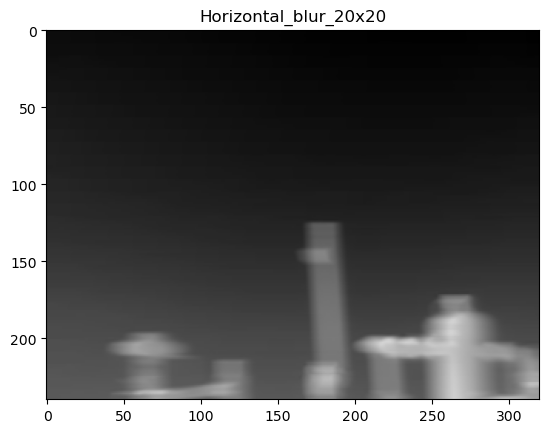

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
img = cv2.imread('Leaks/leak.frame19.jpg')
  
# Specify the kernel size.
# The greater the size, the more the motion.
kernel_size = 20
  
# Create the horizontal kernel.
kernel_h = np.zeros((kernel_size, kernel_size))
  
# Create a copy of the same for creating the vertical kernel.
#kernel_v = np.copy(kernel_v)
  
# Fill the middle row with ones.
#kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
  
# Normalize.
#kernel_v /= kernel_size
kernel_h /= kernel_size
  
# Apply the vertical kernel.
#vertical_mb = cv2.filter2D(img, -1, kernel_v)
  
# Apply the horizontal kernel.
horizonal_mb = cv2.filter2D(img, -1, kernel_h)
  
# Save the outputs.
#cv2.imwrite('car_vertical.jpg', vertical_mb)
cv2.imwrite('car_horizontal_20x20.jpg', horizonal_mb)
plt.imshow(horizonal_mb)
plt.title("Horizontal_blur_20x20")
plt.show()

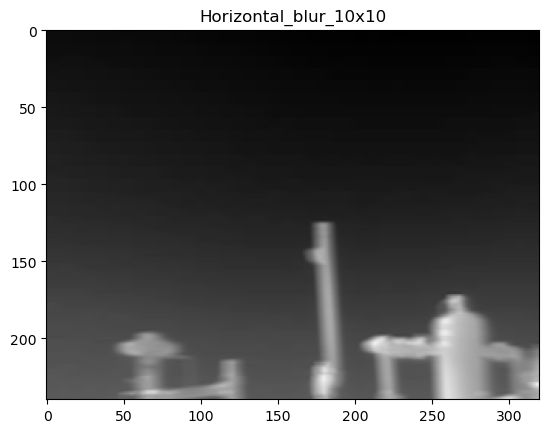

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
img = cv2.imread('Leaks/leak.frame19.jpg')
  
# Specify the kernel size.
# The greater the size, the more the motion.
kernel_size = 10
  
# Create the horizontal kernel.
kernel_h = np.zeros((kernel_size, kernel_size))
  
# Create a copy of the same for creating the vertical kernel.
#kernel_v = np.copy(kernel_v)
  
# Fill the middle row with ones.
#kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
  
# Normalize.
#kernel_v /= kernel_size
kernel_h /= kernel_size
  
# Apply the vertical kernel.
#vertical_mb = cv2.filter2D(img, -1, kernel_v)
  
# Apply the horizontal kernel.
horizonal_mb = cv2.filter2D(img, -1, kernel_h)
  
# Save the outputs.
#cv2.imwrite('car_vertical.jpg', vertical_mb)
cv2.imwrite('car_horizontal_10x10.jpg', horizonal_mb)
plt.imshow(horizonal_mb)
plt.title("Horizontal_blur_10x10")
plt.show()